# Graphene Ring

#### Import the different "Package"

In [1]:


#%run matplotlib_setup.ipy
from matplotlib import pyplot as plt
import numpy as np
import kwant
import math
from math import atan2, pi, sqrt, cos, sin
from cmath import exp


#### Fundamental constant 

In [2]:
h = 6.626069e-34    # Planck constant (Js)
e = 1.602e-19      # electron charge (C)
c = 299792458       # Light celerity (m/s)
kB = 1.3806503e-23  # Boltzmann constant (kg m2/Ks2)
m_e = 9.1e-31       # electron mass (kg)

#### Definition of the graphene function with some parameters

* R_ext is the external radius 
* W is the width of one ring arm
* W_L is the width of the lead
* L_L is the length of the lead starting from the outer circle


In [3]:
def make_system(a=1.0,t=1.0,R_ext=350,W=150,W_L=150,L_L=100,magn_activated=0):
    
    
    graphene = kwant.lattice.honeycomb(a,norbs=1)
    a_lat, b_lat = graphene.sublattices
    sys = kwant.Builder()
 
    # definition geometry
    def circle(pos): return (pos[0]**2 + pos[1]**2 <R_ext**2  and pos[0]**2 + pos[1]**2 >(R_ext-W)**2) \
                            or ((R_ext-W/2)<pos[0]<(R_ext+L_L )
                            and abs(pos[1])<W_L/2) \
                            or (-(R_ext-W/2)>pos[0]>-(R_ext+L_L) 
                            and abs(pos[1])<W_L/2) 
    # definition hopping for magentic field        
    def hopping(site_i, site_j, phi):
        xi, yi = site_i.pos
        xj, yj = site_j.pos
        return -t * exp(-1j*phi*pi/(h/e)*(xi-xj)* (yi + yj)/(a**2))#-1j * pi * phi / (h/e) * (xi - xj) * (yi + yj)/(a*a))


    sys[graphene.shape(circle, (R_ext-W/2,0))] = 0 # onsite energy is zero (latter a potential will be applied)
    hoppings = (((0, 0), a_lat, b_lat), ((0, 1), a_lat, b_lat), ((-1, 1), a_lat, b_lat))
    
     
    if magn_activated==0:
         sys[[kwant.builder.HoppingKind(*hoppingg) for hoppingg in hoppings]] = -t
    
    elif magn_activated==1:
        sys[graphene.neighbors()] = hopping
        
    else:
        print('Wrong input parameter for the magnetic field')
   
    
    
    
    
    
    sym=kwant.TranslationalSymmetry(graphene.vec((1,0)))
    def lead_shape(R): return abs(R[1]) < W_L/2
    
    Hlead =kwant.Builder(sym)
    Hlead[graphene.shape(lead_shape,(0,0) )]=0
    
    
    
    
    if magn_activated==0:
         Hlead[graphene.neighbors()]=-t
    
    elif magn_activated==1:
        Hlead[graphene.neighbors()] = hopping
        
    else:
        print('Wrong input parameter for the magnetic field')
   
    
    
    sys.attach_lead(Hlead)
    sys.attach_lead(Hlead.reversed())
  

    return sys

#### Creation of the physical graphene ring

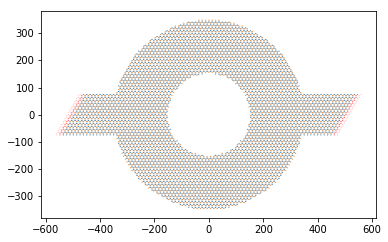

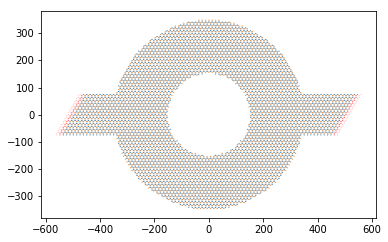

In [4]:
scaling_fact=50
#n2D=1.2e16
#scaling_fact=25
a0=0.246
a=a0*scaling_fact
t0=2.8
t=t0/scaling_fact
R_ext=350
W=200
W_L=150
L_L=100
magn_activated=0
H=make_system(a,t,R_ext,W,W_L,L_L,magn_activated)
kwant.plot(H)

## Analysis of the transmission

In [5]:
scaling_fact=50
#n2D=1.2e16
#scaling_fact=25
a0=0.246
a=a0*scaling_fact
t0=2.8
t=t0/scaling_fact
R_ext=350
W=200
W_L=150
L_L=100
magn_activated=0

## magnetic field 


AB oscillation have a period given by 
Detlta_B=h_bar/(e*R_mean^2)


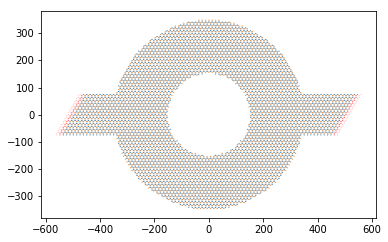

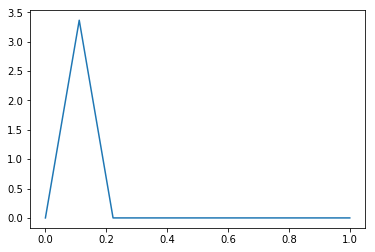

In [7]:
H=make_system(a,t,R_ext,W,W_L,L_L,magn_activated)
kwant.plot(H)

Hf=H.finalized()
#max_E=0.02
#n=20
#E_vect=np.zeros(n)
#T_vect=np.zeros(n)
#init_val=0.000001
#incr=(max_E-init_val)/n

#Results=open("Ring_var_E_fixed_W_R.txt",'w') # Warning: reset every time the results of the .txt file
#for i in range(0,n):  
#  E_vect[i]=init_val
#  smatrix = kwant.smatrix(Hf, energy = init_val)
#  T_vect[i]=smatrix.transmission(1, 0)
#  init_val=init_val+incr
#  Results.write(str(E_vect[i])+"   "+str(T_vect[i])+"   "+"\n")
#Results.close()
#plt.plot(E_vect,T_vect)
#plt.ylabel('transmission T')
#plt.xlabel('Energy E')
#plt.show()


import matplotlib.pyplot as plt
E = np.linspace(0.000001,1,10)
T2 = []
for x in E:
    smatrix = kwant.smatrix(Hf, energy = x)
    T = smatrix.transmission(1,0)
    T2.append(T)
plt.plot(E,T2)    

In [22]:
scaling_fact=50
#n2D=1.2e16
#scaling_fact=25
a0=0.246
a=a0*scaling_fact
#e=1.602e-19
t0=2.8
t=t0/scaling_fact
R_ext=350
W=150
W_L=150
L_L=100
magn_activated=1 # we activate the magnetic field here !



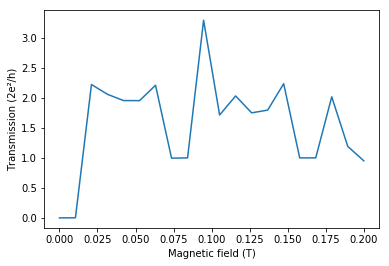

In [23]:



H=make_system(a,t,R_ext,W,W_L,L_L,magn_activated)

H_mf=H.finalized()

#### For a realistic value of phi ####
#B = 0.05 # (Tesla) value of the magnetic field (well, the magnetic flux density for the purists among you)

#phi = B * a**2 *sqrt(3/2)/scaling_fact**2 # with 'a' being the scale value 

E=0.005
N = 20 # number of magnetic field values
Bmax = 0.2 # higher magnetic field
Bs = np.linspace(0, Bmax, N) # vector of the magnetic fields

G = np.zeros([N,1])

for i,B in enumerate(Bs):
    phi = B * a**2 *sqrt(3/2) /scaling_fact**2
    smatrix = kwant.smatrix(H_mf, energy = E,args=[phi] ) # transmission matrix (here this)
    T = smatrix.transmission(1, 0) # transmission value obtained from the left lead towards the right lead
    G[i] = T
    
plt.plot(Bs,G)

plt.xlabel('Magnetic field (T)')
plt.ylabel('Transmission (2e²/h)')

plt.show()
#data = []
#phis = np.linspace(0,1.,10)
#for phi in phis:
#    smatrix = kwant.smatrix(Hf, 3.3,args=[phi])
#    data.append(smatrix.transmission(1, 0))
#pyplot.plot(phis, data,'o');
#pyplot.xlabel('$\phi = BS/(h/e)$')
#pyplot.ylabel('g in unit of $(2e^2/h)$');
#pyplot.title('Aharonov-Effect')



